### Morphological operators are basically kernels that can achieve blurring or smoothing or can also help in reducing noise. Some can add or remove erosion from an existing image.  

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org= (50,300), fontFace = font, fontScale = 5, color=(255,255,255), thickness=18)
    return blank_img

In [49]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [50]:
img = load_img()

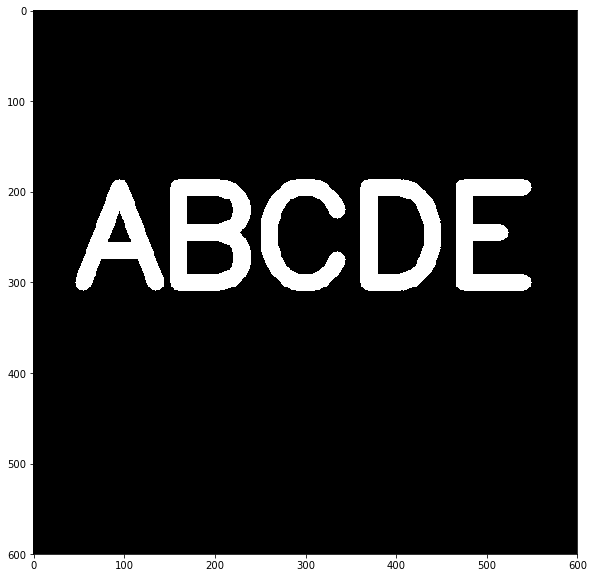

In [51]:
display_img(img)

In [ ]:
# Erosion basically erodes away boundaries of objects in forground

In [43]:
kernel = np.ones((5,5),dtype=np.uint8)

In [55]:
result = cv2.erode(img, kernel, iterations=3)

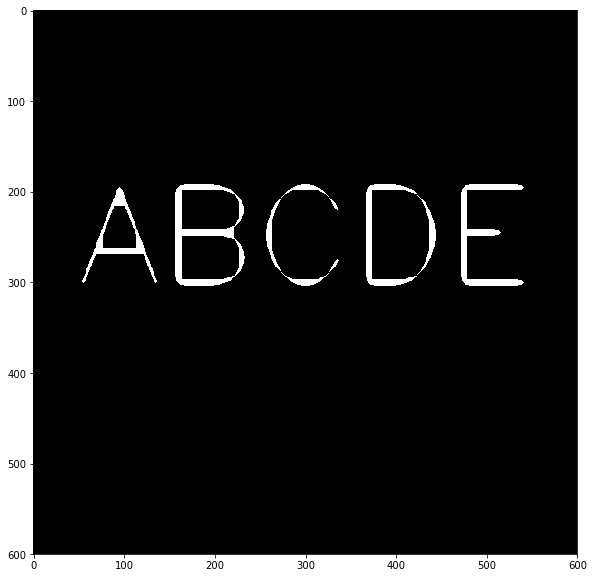

In [56]:
display_img(result)

In [57]:
# Opening makes the image erode and also dilate it, meaning it will add some boundary in the foreground to remove noise

In [58]:
img = load_img()

In [61]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

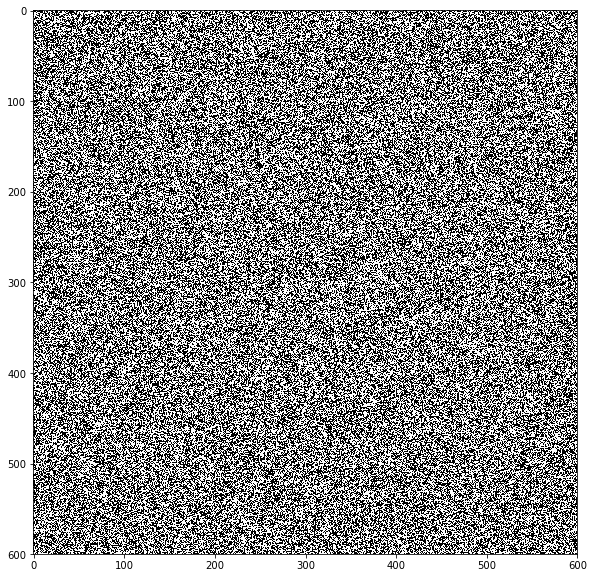

In [62]:
display_img(white_noise) # We will put this on top of our actual image

In [63]:
noise_img = white_noise + img # Adding the noise before scaling it down to original image

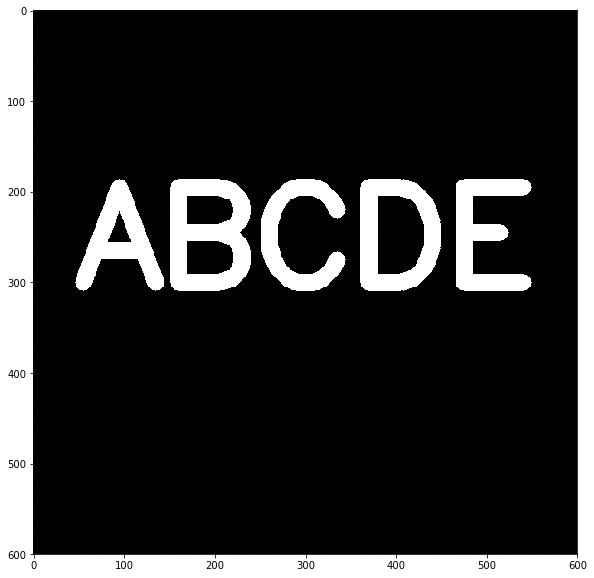

In [64]:
display_img(noise_img) # As a result nothing appears in the image because the max value of our original image is unaffected by 
# adding ones and zeros of the white noise

In [65]:
img.max()

255.0

In [66]:
white_noise = white_noise * 255 # Scaling it to match our original image

In [67]:
noise_img_new = white_noise + img

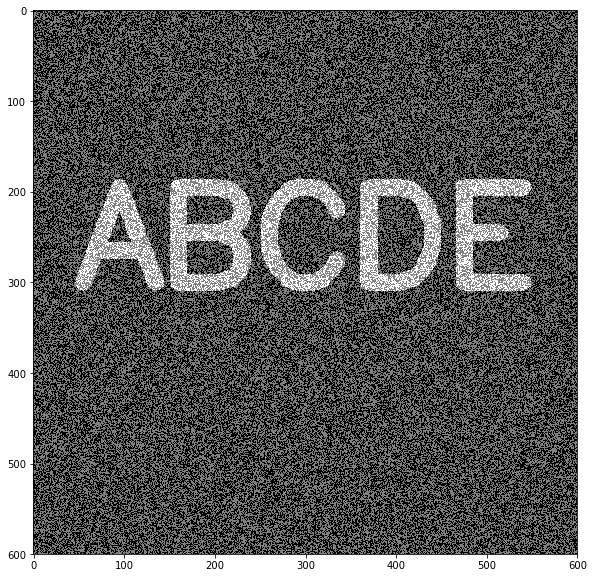

In [68]:
display_img(noise_img_new)

In [71]:
opened_image = cv2.morphologyEx(noise_img_new,cv2.MORPH_OPEN, kernel)

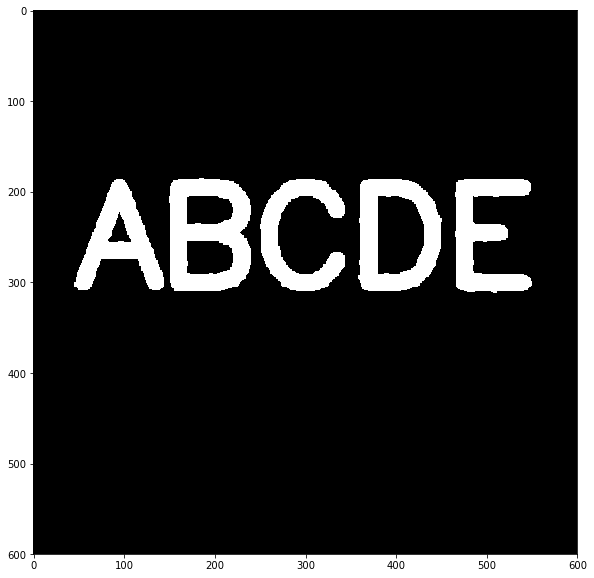

In [72]:
display_img(opened_image)

### Now we shall add noise in the foreground of the image and try to reduce it using closing technique

In [73]:
img = load_img()

In [74]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [77]:
black_noise = black_noise * -255  

In [79]:
black_noise # So it will not affect the black but it will affect the foreground 

array([[   0, -255,    0, ..., -255, -255,    0],
       [-255, -255,    0, ..., -255, -255,    0],
       [-255,    0,    0, ...,    0, -255, -255],
       ...,
       [   0, -255, -255, ...,    0,    0, -255],
       [   0,    0,    0, ..., -255,    0, -255],
       [-255,    0,    0, ...,    0, -255,    0]])

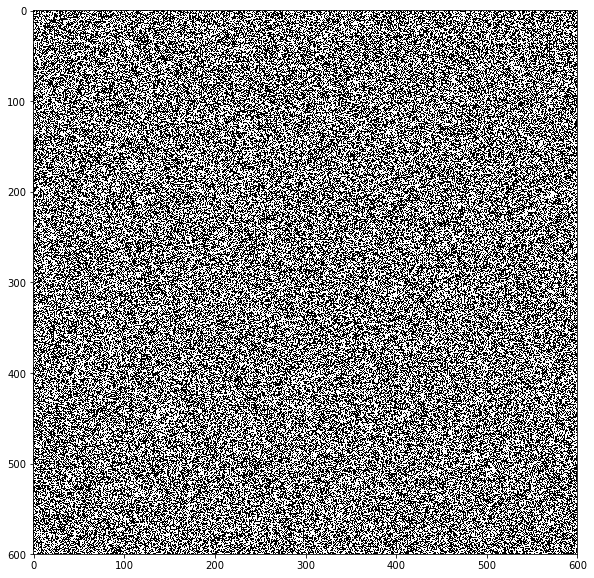

In [78]:
display_img(black_noise)

In [81]:
img.max()

255.0

In [82]:
black_noise_img = img + black_noise

In [85]:
black_noise_img.min()

-255.0

In [86]:
black_noise_img[black_noise_img == -255] = 0

In [87]:
black_noise_img.min()

0.0

In [88]:
black_noise_img.max()

255.0

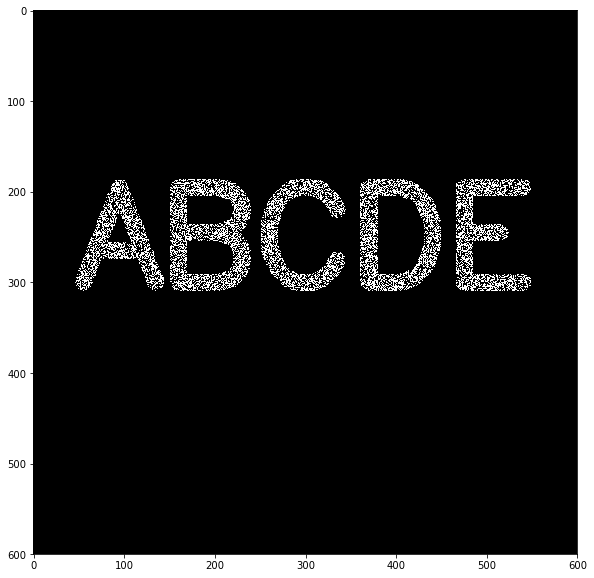

In [89]:
display_img(black_noise_img)

In [91]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

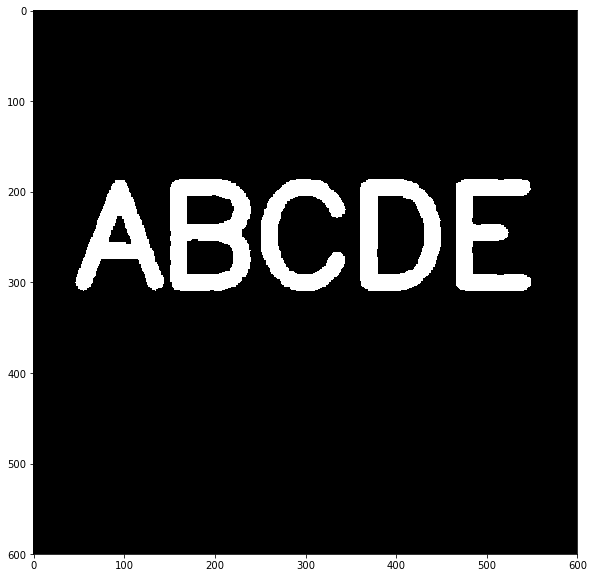

In [92]:
display_img(closing)

# GRADIENT 

In [93]:
# Gradient change is basically the directional change of the intensity or color of an image from one side to another. It will 
# help us in image classification, object tracking, edge detection.
# The opeartor uses two 3X3 kernel for approximating derivatives in x-directional boundaries and y-directional boundaries

In [96]:
sudoku_img = cv2.imread('Computer-Vision-with-Python/DATA/sudoku.jpg',0)

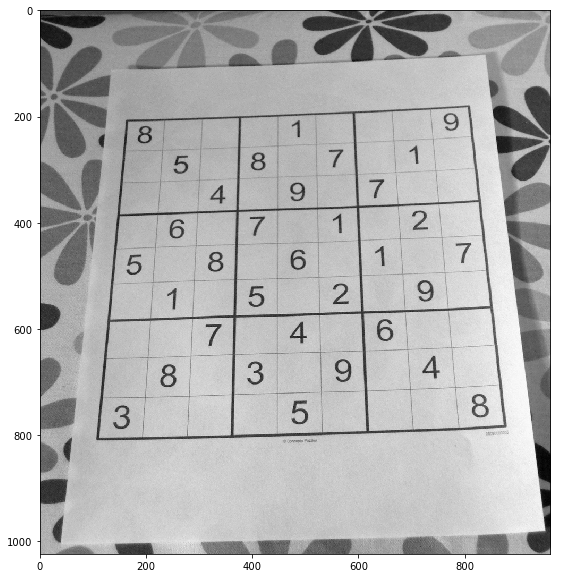

In [97]:
display_img(sudoku_img)

In [100]:
sobelx = cv2.Sobel(sudoku_img,cv2.CV_64F, 1,0,ksize= 5)

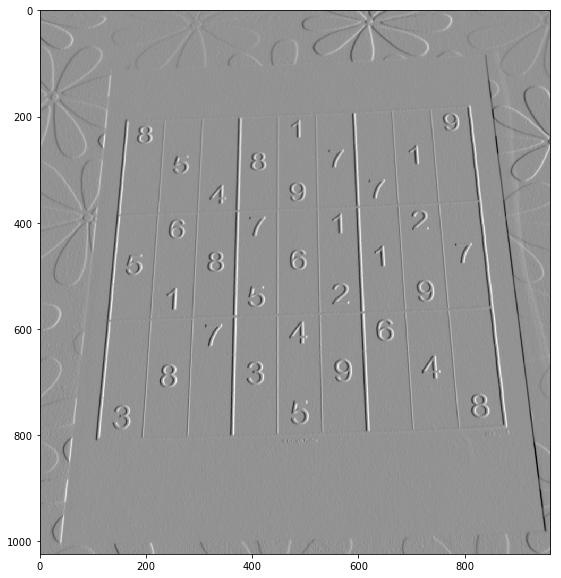

In [101]:
display_img(sobelx)

In [102]:
sobely = cv2.Sobel(sudoku_img,cv2.CV_64F, 0,1,ksize= 5)

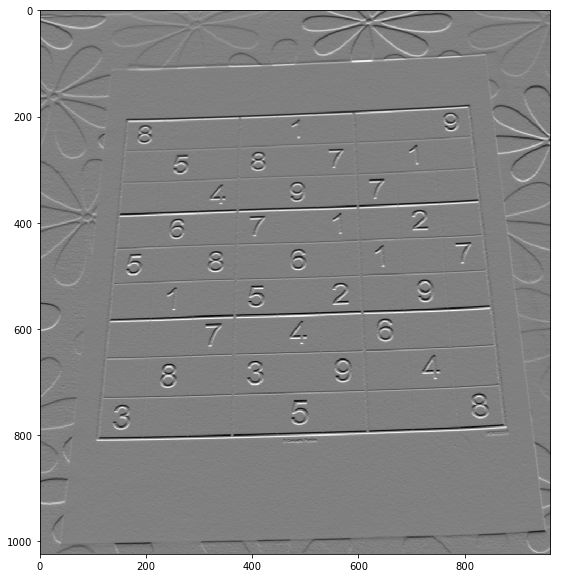

In [103]:
display_img(sobely)

In [104]:
laplace = cv2.Laplacian(sudoku_img,cv2.CV_64F)

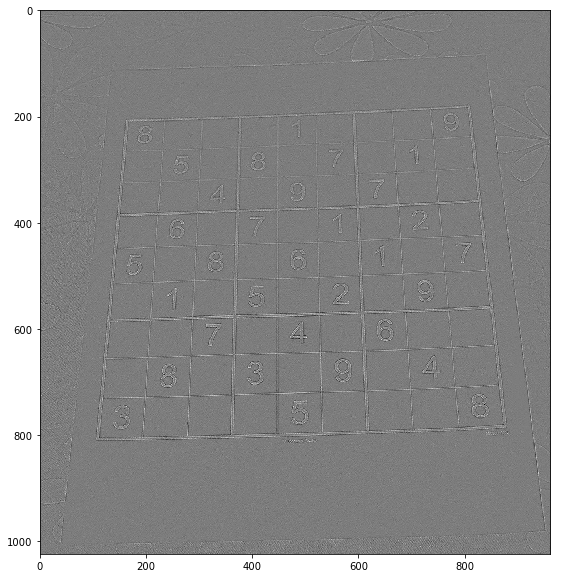

In [105]:
display_img(laplace)

In [109]:
blended = cv2.addWeighted(src1 = sobelx, src2 = sobely, alpha =0.5, gamma = 0,beta =0.5)

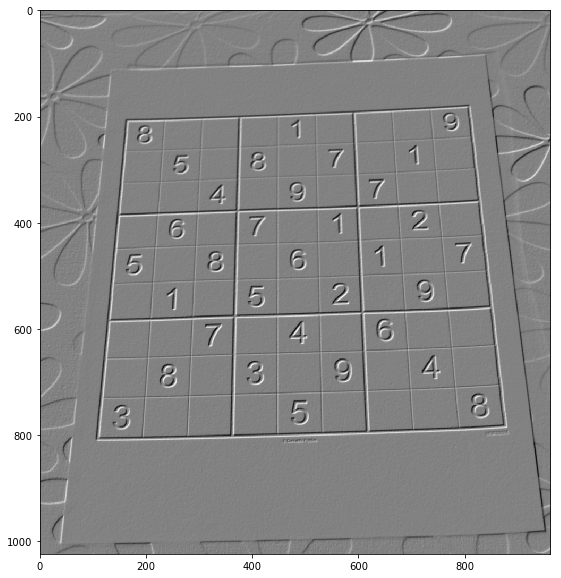

In [110]:
display_img(blended)